In [81]:
#Installing & Importing necessary librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

In [82]:
#Loading the data
df = pd.read_csv('AirPassengers.csv')

In [83]:
#Date & Time formatting
df['Month'] = pd.to_datetime(df['Month'], format= "%Y-%m-%d") 

In [84]:
#Making time as index
df.index = df['Month']

In [85]:
#Drop unecessary column
df.drop(['Month'], axis = 1, inplace = True)

In [86]:
df.shape

(144, 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002768037A048>],
      dtype=object)

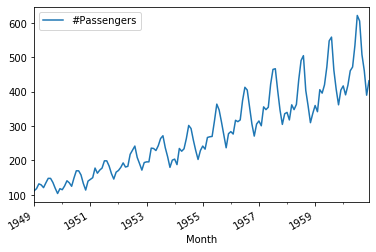

In [87]:
#Time series Plot 
df.plot(subplots=True)

In [88]:
#We are going to use the data of first 100 months as training data 
#and the last 44 months as testing data
#Creating train and test set 
train = df[0:101] 
test = df[101:]

In [89]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


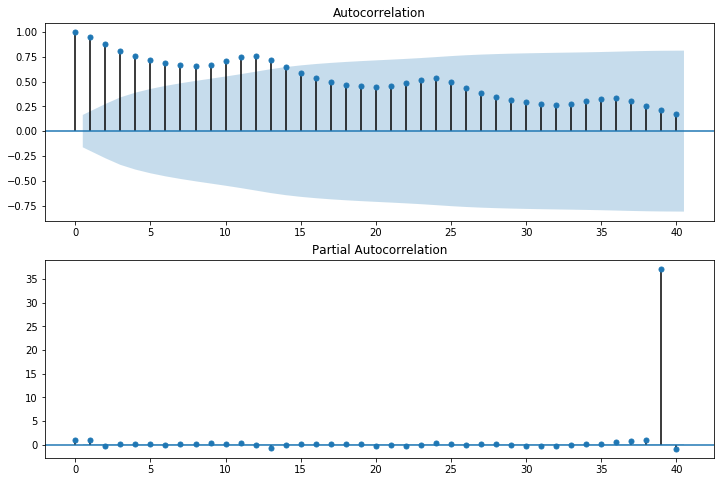

In [90]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['#Passengers'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['#Passengers'].iloc[0:],lags=40,ax=ax2)

In [91]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [98]:
#pqd
#ARIMA
df_model = ARIMA(train, order=(1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [99]:
df_model_fit = df_model.fit()

In [100]:
df_model_fit.aic

908.9050272432523

In [101]:
df_forecast = df_model_fit.forecast(steps = 43)[0]

In [102]:
from sklearn.metrics import mean_squared_error
#from math import sqrt
import numpy as np

In [103]:
np.sqrt(mean_squared_error(test,df_forecast))

74.65599196710676

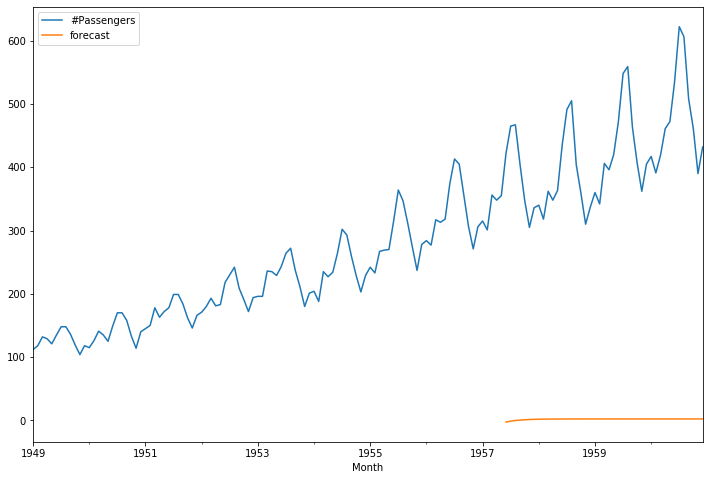

In [105]:
df['forecast']=df_model_fit.predict(start=101,end=144,dynamic=True)
df[['#Passengers','forecast']].plot(figsize=(12,8))

In [107]:
df_model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,24))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [108]:
df_model_fit = df_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [109]:
#results.summary()
df_model_fit.aic

606.6543167159269

In [113]:
df_forecast = df_model_fit.forecast(steps = 43)

In [114]:
np.sqrt(mean_squared_error(test,df_forecast))

31.472033559322274

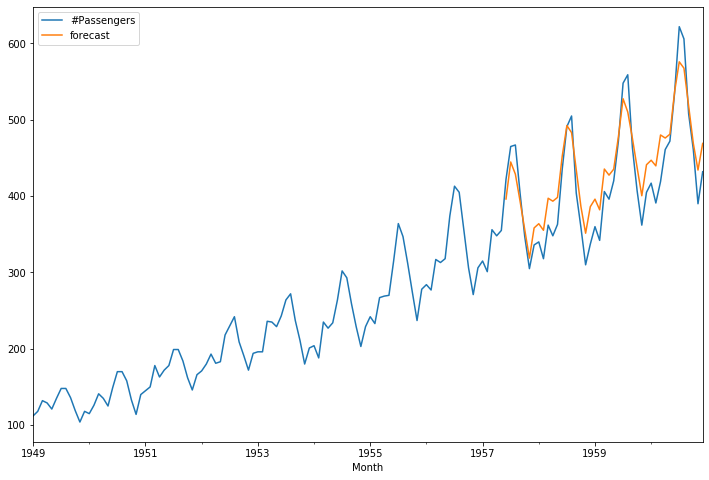

In [116]:
df['forecast']=df_model_fit.predict(start=101,end=144,dynamic=True)
df[['#Passengers','forecast']].plot(figsize=(12,8))

In [118]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,50)]

In [119]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [120]:
future_df=pd.concat([df,future_datest_df])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



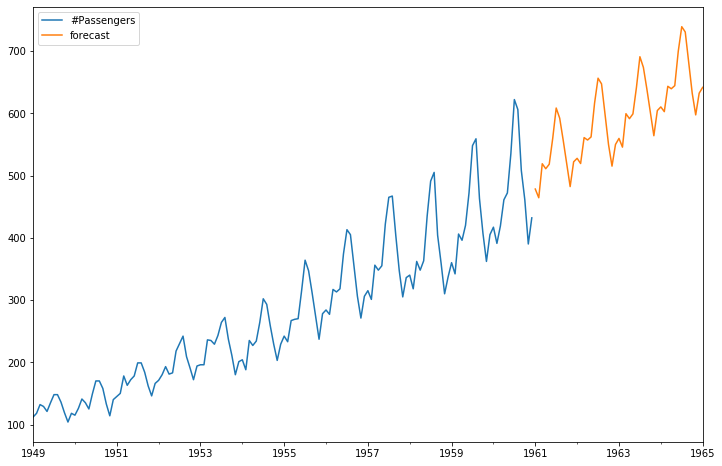

In [134]:
future_df['forecast'] = df_model_fit.predict(start = 144, end = 200, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8))

In [135]:
df1 = future_df.forecast

In [136]:
df1.dropna(inplace = True)

In [137]:
df1 = df1.astype(dtype = 'int64')

In [138]:
future_df1=pd.concat([df,df1])

In [139]:
future_df1

,#Passengers,forecast,0
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
...,...,...,...
1964-09-01,NaN,NaN,681.0
1964-10-01,NaN,NaN,632.0
1964-11-01,NaN,NaN,597.0
1964-12-01,NaN,NaN,632.0


In [140]:
future_df1 = future_df1.drop('forecast', axis = 1)

In [141]:
future_df1.rename(columns={ 0 :'forecast'}, inplace=True)

In [142]:
import dtale

In [143]:
dtale.show(future_df1)